# **Breast Cancer**

**Dataset and Problem Description**

Göğüs kanseri datasıyla tümörün iyi huylu mu kötü huylu mu olduğu anlaşılmaya çalışılacaktır.

Datada, 

*   Görüntüde bulunan hücre çekirdeklerinin özellikleri tanımlanmıştır.
*   Her hücre çekirdeği için 10 gerçek değere ait özellik hesaplanmıştır.   
*   Feature extraction yapılarak 10 feature'dan 32 feature oluşturulmuştur.
*   Missing value bulunmamaktadır.
*   357 sample kötü huylu, 212 sample iyi huylu olarak sınıflandırılmıştır. 
   

**Import Libraries and Diagnose Data**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv(r"C:\Users\ŞEVVAL\Desktop\data.csv")

In [ ]:
data.drop(['Unnamed: 32','id'], inplace = True, axis = 1)

Unnamed: 32 sütununda missing valuelar bulunmaktadır ve id sütunu da classification yapılırken kullanılmayacaktır. 

Bu yüzden drop methoduyla datadan kaldırılır.

In [ ]:
data = data.rename(columns = {"diagnosis":"target"})

diagnosis feature'ının ismi target olarak değiştirilmiştir.

B    357
M    212
Name: target, dtype: int64


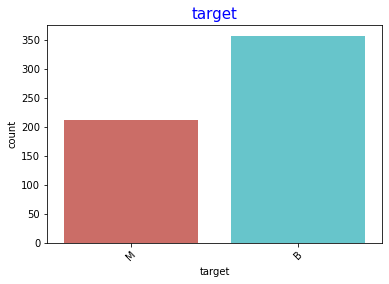

In [ ]:
print(data.target.value_counts())
sns.countplot(data["target"],palette="hls")
plt.title("target",color = 'blue',fontsize=15)
plt.xticks(rotation=45)
plt.show()

Target feature'ında 357 kötü huylu tümör, 212 iyi huylu tümör bulunmaktadır.

Count plot ile görselleştirmesi yapılmıştır.

In [ ]:
type("target")

str

In [ ]:
data["target"] = [1 if i.strip() == "M" else 0 for i in data.target]
#strip methodu ile eğer boşluk varsa ortadan kaldırılır.

Classification yapılırken karşılaştırma yapabilmek için sayısal değerler bulunmalıdır.

Bu nedenle kötü huylu tümör 1, iyi huylu tümör 0 olarak labellanır.

In [ ]:
print(len(data))

569


Datada 569 sample bulunmaktadır.

In [ ]:
data.head()

target  radius_mean  texture_mean  perimeter_mean  area_mean  \
0       1        17.99         10.38          122.80     1001.0   
1       1        20.57         17.77          132.90     1326.0   
2       1        19.69         21.25          130.00     1203.0   
3       1        11.42         20.38           77.58      386.1   
4       1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [ ]:
print("Data shape ", data.shape)

Data shape  (569, 31)


Data 31 feature ve 569 sampledan oluşmaktadır.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

31 tane sayısal veri bulunduran column bulunmaktadır.

Sayısal verilerin incelenmesi categorical verilere göre daha kolaydır. 

In [ ]:
describe = data.describe()
describe

target  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

area_mean ve radius_mean featurelarına bakıldığında veriler arasında çok büyük scale farkı olduğu görülmektedir.

Yüksek değer bulunduran featurelar, düşük değer bulunduran featurelara baskınlık kurar ve model kurulurken bu featureların etkisi yokmuş gibi hesaplanır.

Bu yüzden normalization yapılacaktır.

**Exploratory Data Analysis (EDA)**

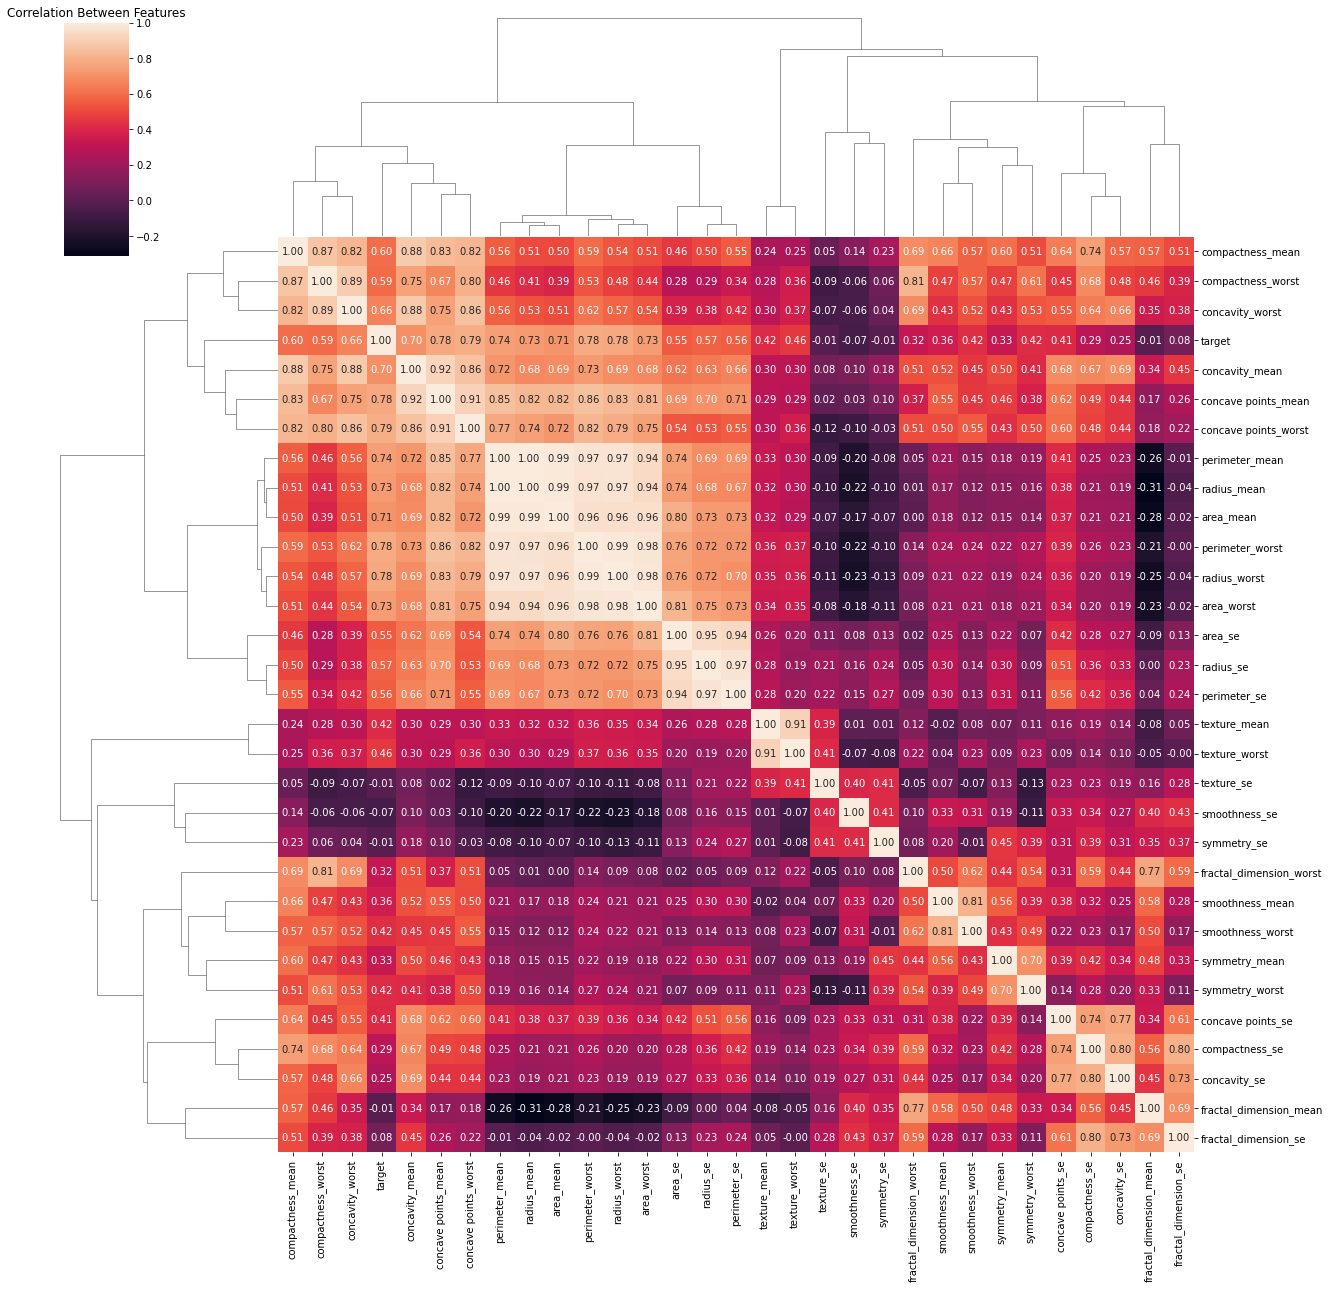

In [ ]:
#cluster map
corr_matrix = data.corr()
sns.clustermap(corr_matrix, annot = True, figsize=(18, 18), fmt = ".2f")
plt.title("Correlation Between Features")
plt.show()

Featurelar arasındaki corelation'a bakmak için cluster map kullanılmıştır.

İki feature arasındaki corelation 1'e yaklaştıkça doğru orantılı bir ilişki, -1'e yaklaştıkça ters orantılı bir ilişki vardır.

0'a yaklaştıkça corelation kaybolur.

Cluster map incelendiğinde,

*   radius_mean ve area_mean arasında doğru orantılı bir ilişki olduğu görülmektedir.
*   Daha sonra bu iki feature'ın perimeter mean ile doğru orantılı bir ilişki olduğu içerisinde olduğu görülmektedir.



    
    
    

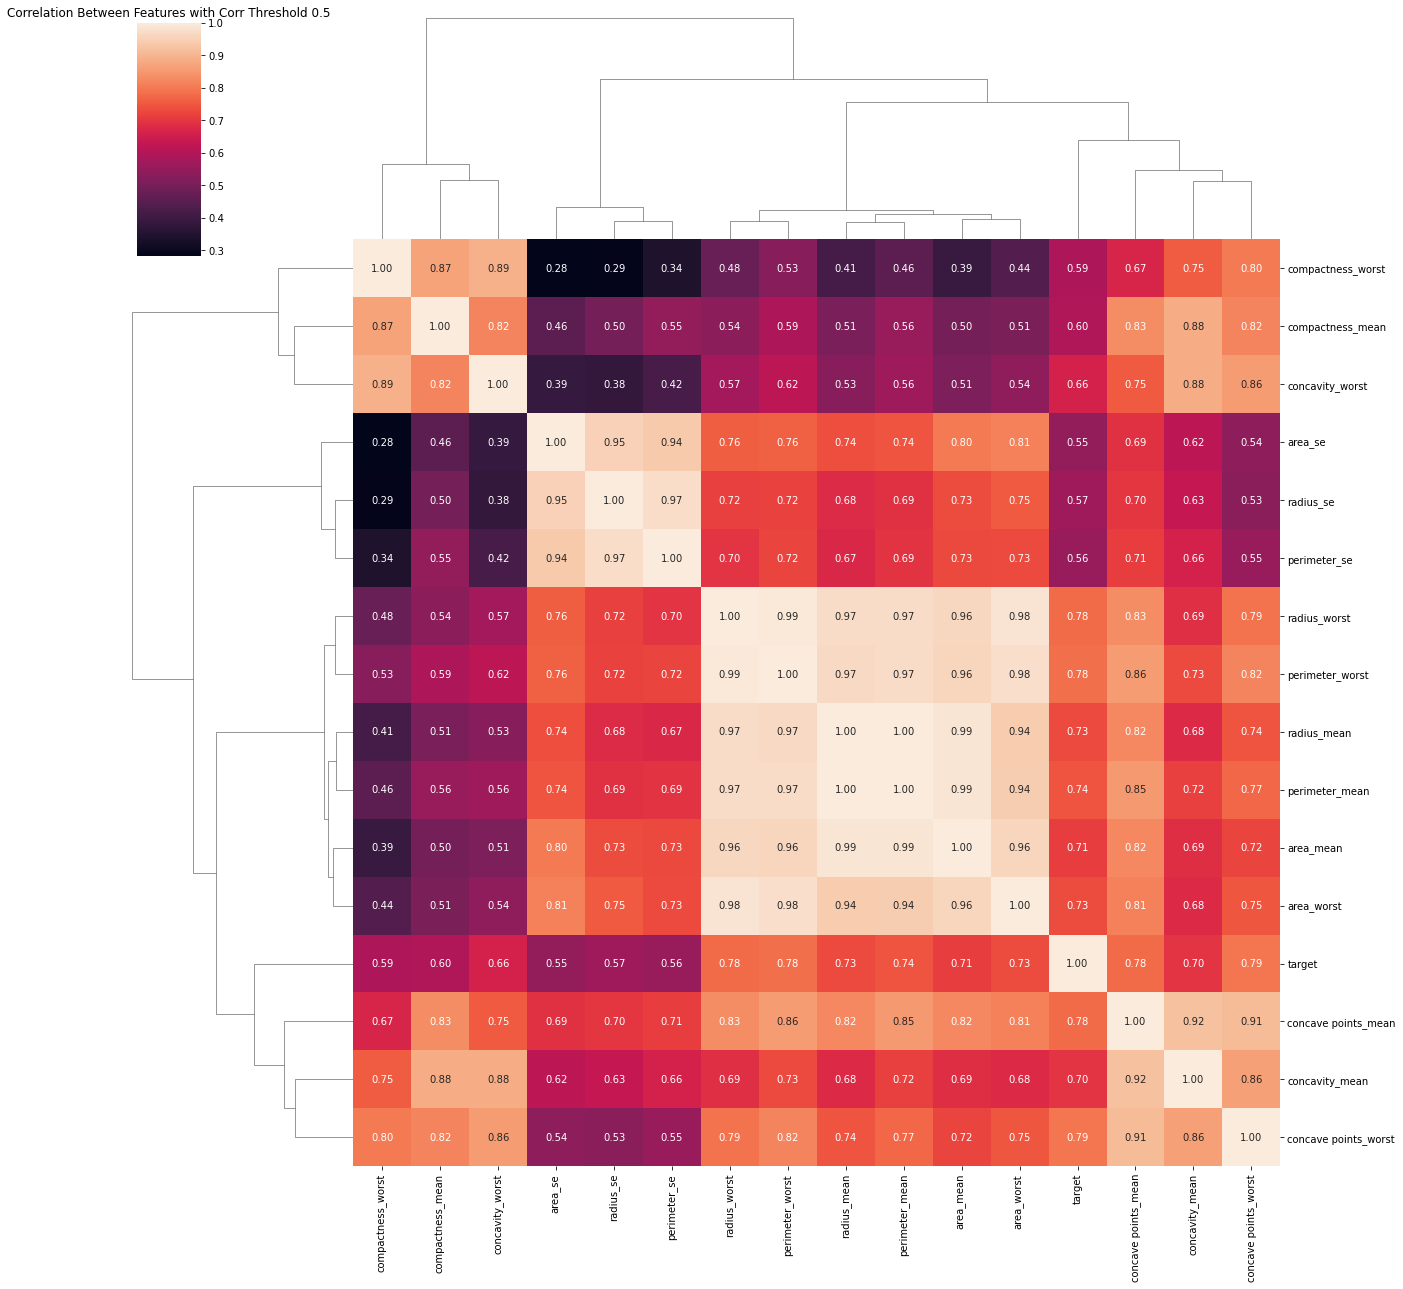

In [ ]:
#cluster map
threshold = 0.5
filtre = np.abs(corr_matrix["target"]) > threshold
#featurelar arasında negatif yönlü bir corelation da olabileceğinden absolute methoduyla mutlak değeri alınır. 
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(data[corr_features].corr(), annot = True,figsize=(18, 18), fmt = ".2f")
plt.title("Correlation Between Features with Corr Threshold 0.5")
plt.show()

0.5 değerinde bir threshold koyularak, corelation değerleri 0.5'ten fazla olan featurelara bakılmıştır.

target classının radius_mean ve area_mean featurelarıyla 0.7 değerinde bir corelation içerisinde olduğu görülmektedir.

In [ ]:
data_melted = pd.melt(data, id_vars = "target",var_name = "features",value_name = "value")

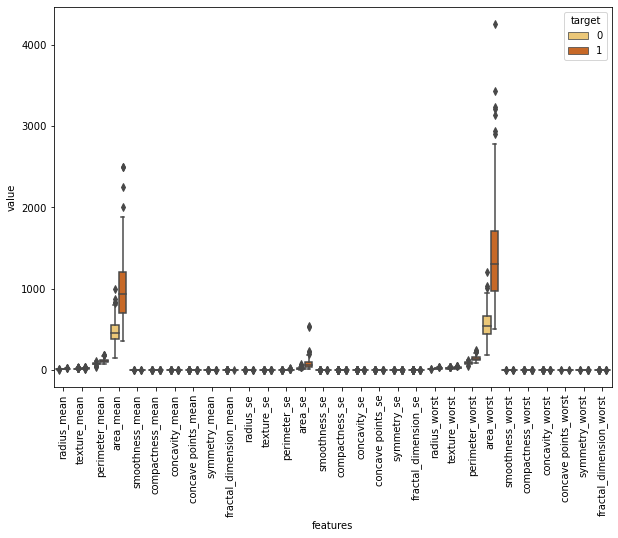

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(x = "features", y = "value", hue = "target", data = data_melted, palette="YlOrBr")
plt.xticks(rotation = 90)
plt.show()

Boxplot ile target classına göre outlier detection yapılmıştır. 

seaborn x değişkeninde depolanan featurelardan unique olanları bulur.

hue parametresi target sütunundaki unique değerleri (iyi huylu tümör, kötü huylu tümör) bulur, x ve y ekseninde classlarına ayırır.

*    box plotta kutunun içindeki çizgi median değerini, kutunun kenarlarındaki çizgiler lower quartile ve upper quartile değerlerini verir. kısa çizgiler ise minimum ve maximum değerleridir.
    
*    lower quartile listedeki en küçük sayı ile listenin medianının ortasındaki sayıdır, first quantile (25%) olarak da adlandırılır.
    
*    Upper quartile listenin medianı ile listedeki en büyük sayının ortasındaki sayıdır, third quantile (75%) olarak da adlandırılır.
    
*    Lower quartile(Q1) ile upper quartile(Q3) arasındaki mesafe interquartile range'dir, yani boxun uzunluğudur.
*    Minimum değerin altında ve maximum değerin üstünde kalan değerler outlierdır.
    
*    Boxplotta kutu ne kadar uzun olursa veri o kadar dağılmış demektir.
    
Boxplottan anlam çıkarılabilmesi için veriye standardization yapılması lazımdır.

Standardization yapıldıktan sonra tekrardan box plot çizdirilecektir.

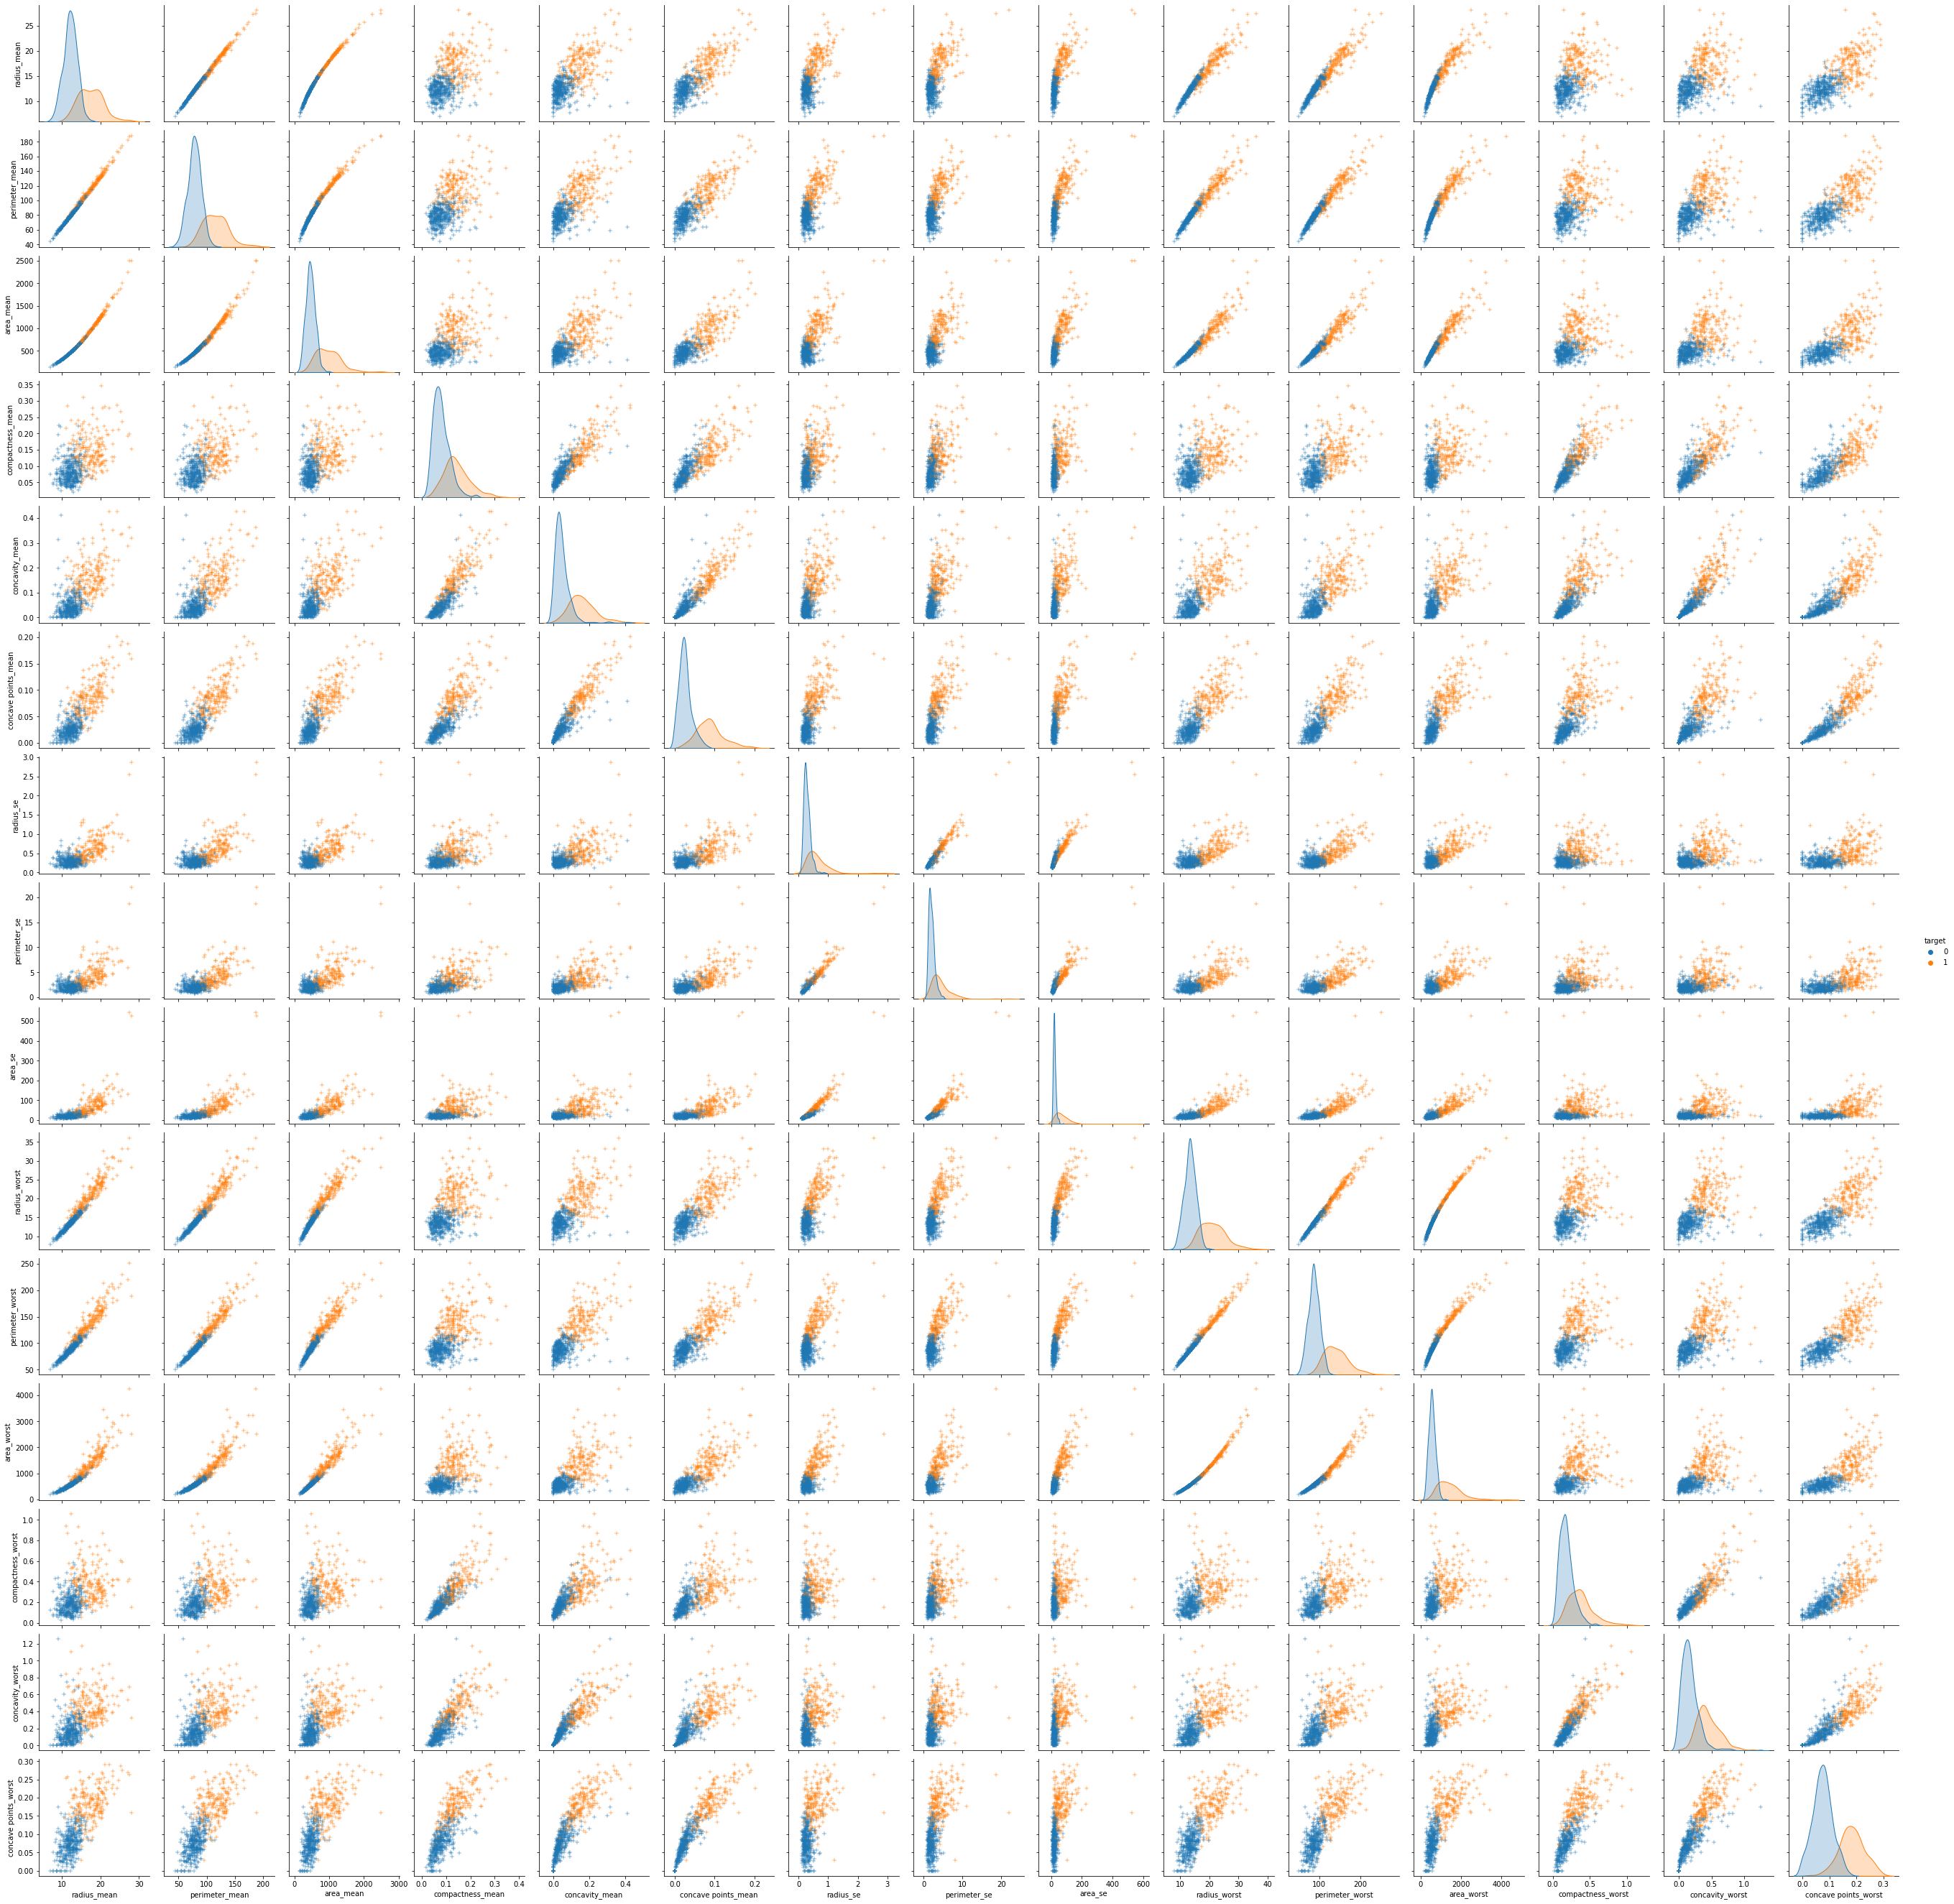

In [ ]:
sns.pairplot(data[corr_features], diag_kind = "kde", markers = "+",hue = "target")
plt.show()

İki class olduğu için plotta turuncu ve mavi olarak iki farklı renk bulunmaktadır.

Daha önce cluster map'te de görüldüğü üzere pair plot'a bakılarak radius_mean ve area_mean, radius_mean ve perimeter_mean featureları arasında doğru orantılı bir ilişki olduğu görülür.

Pair plotta belli başlı featureların histogramlarına bakılarak dağılımları yorumlanabilir.

**Gaussian dağılımında belirli bir mean, standart sapmalar bulunur ve bu dağılım mean çevresinde simetrik bir dağılıma sahiptir(normal distribution).**

**Eğer dağılım sağa doğru uzadıysa pozitif skewness, sola doğru uzadıysa negatif skewness vardır.**

Pozitif skewness'a gelir dağılımı örnek verilebilir. Mean değerinden çok yüksek değerde gelir dağılımına sahip insanlar vardır.

Negatif skewness'a kolay sınavın notları örnek verilebilir. Çoğunluk yüksek sonuç almıştır, ancak düşük sonuç alan az sayıda insan bulunduğu için dağılım sola doğru uzar.

skew methoduyla skewnesslığa bakılabilir, eğer değer 1'den büyükse pozitif skewness, -1'den küçükse de negatif skewness vardır denilir.

**Outlier detection yapılırken skewnesslığı handle edebilecek detection yöntemi kullanılmalıdır.**

radius_worst ile perimeter_worst featurelarında skewness'ın çok olmadığı, gaussian bir dağılım olduğu görülür.

concavity_mean ve concave points_mean featurelarında iyi huylu tümörde(mavi) pozitif bir skewness olduğu görülür.

compactness_worst ve concave points_mean featurelarında kötü huylu tümörde(turuncu) pozitif bir skewness olduğu görülür. 

**Outlier Detection**

Outliers veri setinde bulunan aykırı değerlerdir, ölçümlerde bulunan hata kaynaklı olabilir. 

Eğer ayıklanmazsa modeli yanlış yönlendirebilir.

Density based outlier detection system'den local outlier factor kullanılacaktır.

Skew data içerisinde bulunan outlierları tespit edebilmek için local outlier yöntemi etkili bir yöntemdir.

Bu yöntemde bir noktanın local density'si, o noktanın k-nearest neighbour'unun density'si ile karşılaştırılır.









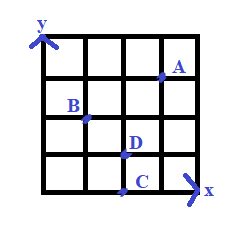

A,B,C,D datada bulunan verilerdir.

A noktasının datada bulunan bir outlier olup olmadığı hesaplanmaya çalışılacaktır.

LOF(a) > 1 -> outlier

LOF(a) < 1 -> inlier

1 değeri bir hyperparameterdır. Threshold değeri veriye göre değişir.

Bu örnek için k değeri 2 olarak seçilmiştir. Ancak outlier detection yapılırken 20 seçildiğinde daha iyi sonuçlar verir.

**RD(a) = ∑ max ( k.(2) distance of b, dist(a,b) + max ( k.(2) distance of d, dist(a,d)**

**Average Reachability Distance (ARD)(a) = RD(a) / k** 

**Local Reachability Density (LRD)(a) = 1 / Average Reachability Distance (ARD)**

**Local Outlier Factor (LOF) =  (LRD(b) +  LRD(c))  / LRD(a) (outlier tespiti yapılacak nokta) ) * (1/k)**

In [ ]:
y = data.target
x = data.drop(["target"],axis = 1)
columns = x.columns.tolist() #feature isimleri depolanır.

target label'dır (y).

Datadan target label'ı çıkarıldığında geriye featurelar kalır (x).

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(x) 
X_score = clf.negative_outlier_factor_

LocalOutlierFactor() modelinde k değeri default olarak 20 verilmiştir.

y_pred'de -1 ve 1 değerleri bulunur. -1 outlier, 1 inlier (outlier olmayan) anlamına gelir.

In [ ]:
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score
outlier_score.head(15)

score
0  -1.422440
1  -1.066782
2  -0.978948
3  -1.596933
4  -1.069936
5  -1.773071
6  -1.015687
7  -1.251746
8  -1.380515
9  -1.644357
10 -0.997602
11 -1.061786
12 -1.129491
13 -1.258444
14 -0.968637

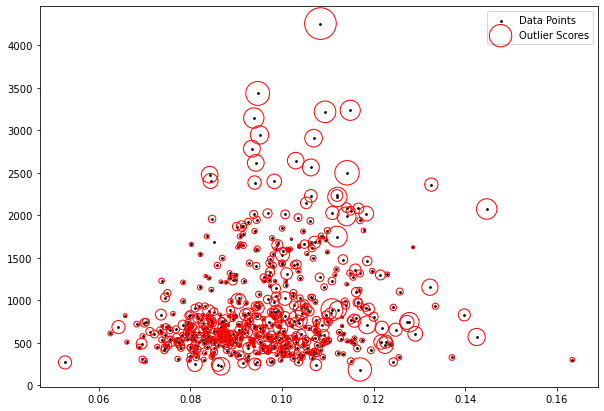

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x.iloc[:,4], x.iloc[:,23], color = "k", s = 3, label = "Data Points")

radius = (X_score.max() - X_score)/(X_score.max() - X_score.min())
outlier_score["radius"] = radius

plt.scatter(x.iloc[:,4], x.iloc[:,23], s = 1000*radius, edgecolors = "r",facecolors = "none", label = "Outlier Scores")
plt.legend()
plt.show()

Outlier olmaya yakın noktaların çemberi daha büyüktür. 

2 boyutlu olarak 4. (area_mean) ve 23. (area_worst) sütunlar çizdirilmiştir.

In [ ]:
threshold = -1.5
filtre = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre].index.tolist()

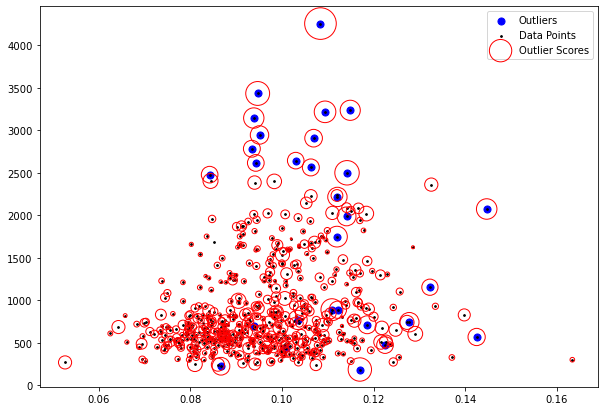

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x.iloc[outlier_index,4], x.iloc[outlier_index,23],color = "blue", s = 50, label = "Outliers")
plt.scatter(x.iloc[:,4], x.iloc[:,23], color = "k", s = 3, label = "Data Points")

radius = (X_score.max() - X_score)/(X_score.max() - X_score.min())
outlier_score["radius"] = radius

plt.scatter(x.iloc[:,4], x.iloc[:,23], s = 1000*radius, edgecolors = "r",facecolors = "none", label = "Outlier Scores")
plt.legend()
plt.show()

-1.5'un üzerindeki outlierlar plota bakılarak görülmektedir.

In [ ]:
#drop outliers
x = x.drop(outlier_index)
y = y.drop(outlier_index).values

threshold değerinden yüksek olan outlierlar datadan drop edilir.

**Preparation of Train and Test Data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

train test split methodunda shuffle parametresi default olarak True tanımlanmıştır.

Bu parametreyle data karıştılır ve o şekilde train, test verisetlerine ayrılır.

random_state parametresiyle data kod her çalıştırıldığında aynı şekilde ayrılır.

random_state değerleri bir id'dir ve her id'de farklı randomlıkta ayrılmış train test verileri bulunur.

Data her seferinde farklı şekilde karıştırılırsa oluşturulan model bu ayrımdan etkilenecektir ve accuracy'yi artırmak için bir parametre değişikliği yapıldığında sonuç artması ya da azalmasının parametre değişiminden kaynaklı olduğunun anlaşılması için  random_state parametresi ile train ve test datasının ayrımı sabitlenir.

**Standardization**

Standardization işlemi ile veri yeniden ölçeklendirilir.

Standardization işleminden sonra verinin mean'i 0, standart sapması 1'e gelmiş olur.

x = [1,2,3,4,5], mean=3, std=1.5

x-mean = [-2,-1,0,1,2] -> mean 0, std=1.5

(x-mean) / (std) = mean 0, std = 1

Standardization yapılması için veride skewnesslık olmaması, Gaussian bir dağılıma sahip olması gerekir.

Veride bulunan samplelarda çok fazla farklılık varsa standardization işlemi yapılması gerekir. 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

x_train'e göre eğitilmiş scaler x_test datasına uygulanır.

Data scale edildiğine göre boxplot görselleştirilmesi yapılacaktır.

In [ ]:
X_train_df = pd.DataFrame(X_train, columns = columns)

In [ ]:
X_train_df_describe = X_train_df.describe()
X_train_df_describe

radius_mean  texture_mean  perimeter_mean     area_mean  \
count  3.780000e+02  3.780000e+02    3.780000e+02  3.780000e+02   
mean   1.145101e-16 -2.499837e-16   -7.520439e-16 -5.621789e-17   
std    1.001325e+00  1.001325e+00    1.001325e+00  1.001325e+00   
min   -2.005064e+00 -1.931818e+00   -1.995752e+00 -1.548345e+00   
25%   -7.202340e-01 -7.250871e-01   -7.251600e-01 -7.161212e-01   
50%   -2.117666e-01 -1.271575e-01   -2.208639e-01 -2.844190e-01   
75%    5.747814e-01  5.508775e-01    5.899973e-01  4.562448e-01   
max    2.696763e+00  4.604783e+00    2.921487e+00  3.034658e+00   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count     3.780000e+02      3.780000e+02    3.780000e+02         3.780000e+02   
mean     -5.932938e-17     -9.046262e-17   -9.046262e-17        -2.379049e-16   
std       1.001325e+00      1.001325e+00    1.001325e+00         1.001325e+00   
min      -2.337180e+00     -1.493802e+00   -1.095251e+00        -1.275306e+00   
25%      -7.842072e-01     -7.671882e-01   -7.375790e-01        -7.340499e-01   
50%      -5.958542e-02     -2.735319e-01   -3.765883e-01        -4.031242e-01   
75%       6.661477e-01      5.953274e-01    4.680688e-01         5.610852e-01   
max       3.257523e+00      4.274970e+00    4.565891e+00         3.793188e+00   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count   3.780000e+02            3.780000e+02  ...  3.780000e+02   
mean    1.265008e-15            5.639228e-17  ... -5.330833e-16   
std     1.001325e+00            1.001325e+00  ...  1.001325e+00   
min    -2.332893e+00           -1.974271e+00  ... -1.668744e+00   
25%    -6.845733e-01           -6.358604e-01  ... -7.013114e-01   
50%    -2.764092e-02           -1.699528e-01  ... -2.727169e-01   
75%     5.436047e-01            5.246162e-01  ...  5.928059e-01   
max     4.569965e+00            5.172766e+00  ...  2.961981e+00   

       texture_worst  perimeter_worst    area_worst  smoothness_worst  \
count   3.780000e+02     3.780000e+02  3.780000e+02      3.780000e+02   
mean    2.926818e-16    -2.951783e-17 -4.111937e-18      3.125072e-16   
std     1.001325e+00     1.001325e+00  1.001325e+00      1.001325e+00   
min    -2.046095e+00    -1.653399e+00 -1.297973e+00     -2.124460e+00   
25%    -7.484720e-01    -7.122694e-01 -6.914133e-01     -6.948137e-01   
50%    -4.244817e-02    -2.659842e-01 -3.434359e-01     -6.996826e-02   
75%     6.116383e-01     6.366920e-01  4.397739e-01      6.503081e-01   
max     3.905605e+00     3.490314e+00  3.408091e+00      3.136057e+00   

       compactness_worst  concavity_worst  concave points_worst  \
count       3.780000e+02     3.780000e+02          3.780000e+02   
mean        1.826875e-16     1.245330e-16         -2.255691e-16   
std         1.001325e+00     1.001325e+00          1.001325e+00   
min        -1.376031e+00    -1.290584e+00         -1.753644e+00   
25%        -7.131652e-01    -7.639220e-01         -7.534099e-01   
50%        -2.405243e-01    -2.677838e-01         -2.181037e-01   
75%         5.063205e-01     5.717480e-01          7.266850e-01   
max         4.736379e+00     4.974318e+00          2.869419e+00   

       symmetry_worst  fractal_dimension_worst  
count    3.780000e+02             3.780000e+02  
mean     4.552502e-16            -6.461615e-17  
std      1.001325e+00             1.001325e+00  
min     -2.164817e+00            -1.742506e+00  
25%     -6.879717e-01            -6.816555e-01  
50%     -1.153003e-01            -2.278042e-01  
75%      4.733370e-01             4.768924e-01  
max      4.845051e+00             3.811193e+00  

[8 rows x 30 columns]

mean değerleri e^-16, 0'a çok yakın bir değer,

standart sapmasının da 1 olduğu görülür.

In [ ]:
X_train_df["target"] = Y_train

In [ ]:
data_melted = pd.melt(X_train_df, id_vars = "target",
                      var_name = "features",
                      value_name = "value")

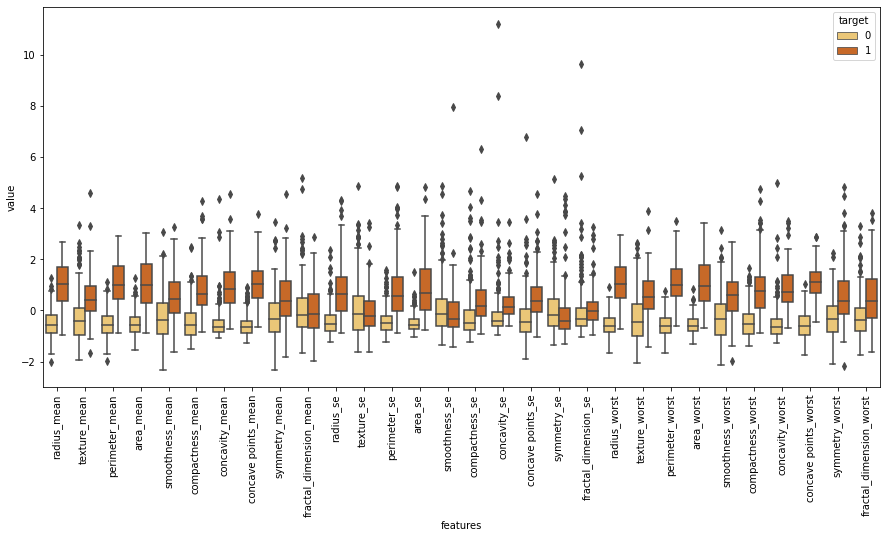

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "features", y = "value", hue = "target", data = data_melted,palette="YlOrBr")
plt.xticks(rotation = 90)
plt.show()

concavity_se feature'ında çok yüksek outlier olduğu görülmektedir.

Outlierlar density'e göre drop edilmiştir.

Eğer model gerekli performansı sağlayamazsa istatiksel modellere göre de outlierların çıkarılması gerekebilir.

Box plota bakılarak concavity_mean, concave points_mean feature'larının iki class için median değerinin çok farklı olduğu görülür, bir threshold koyularak classlar arasında iyi bir ayrım yapılabilir.

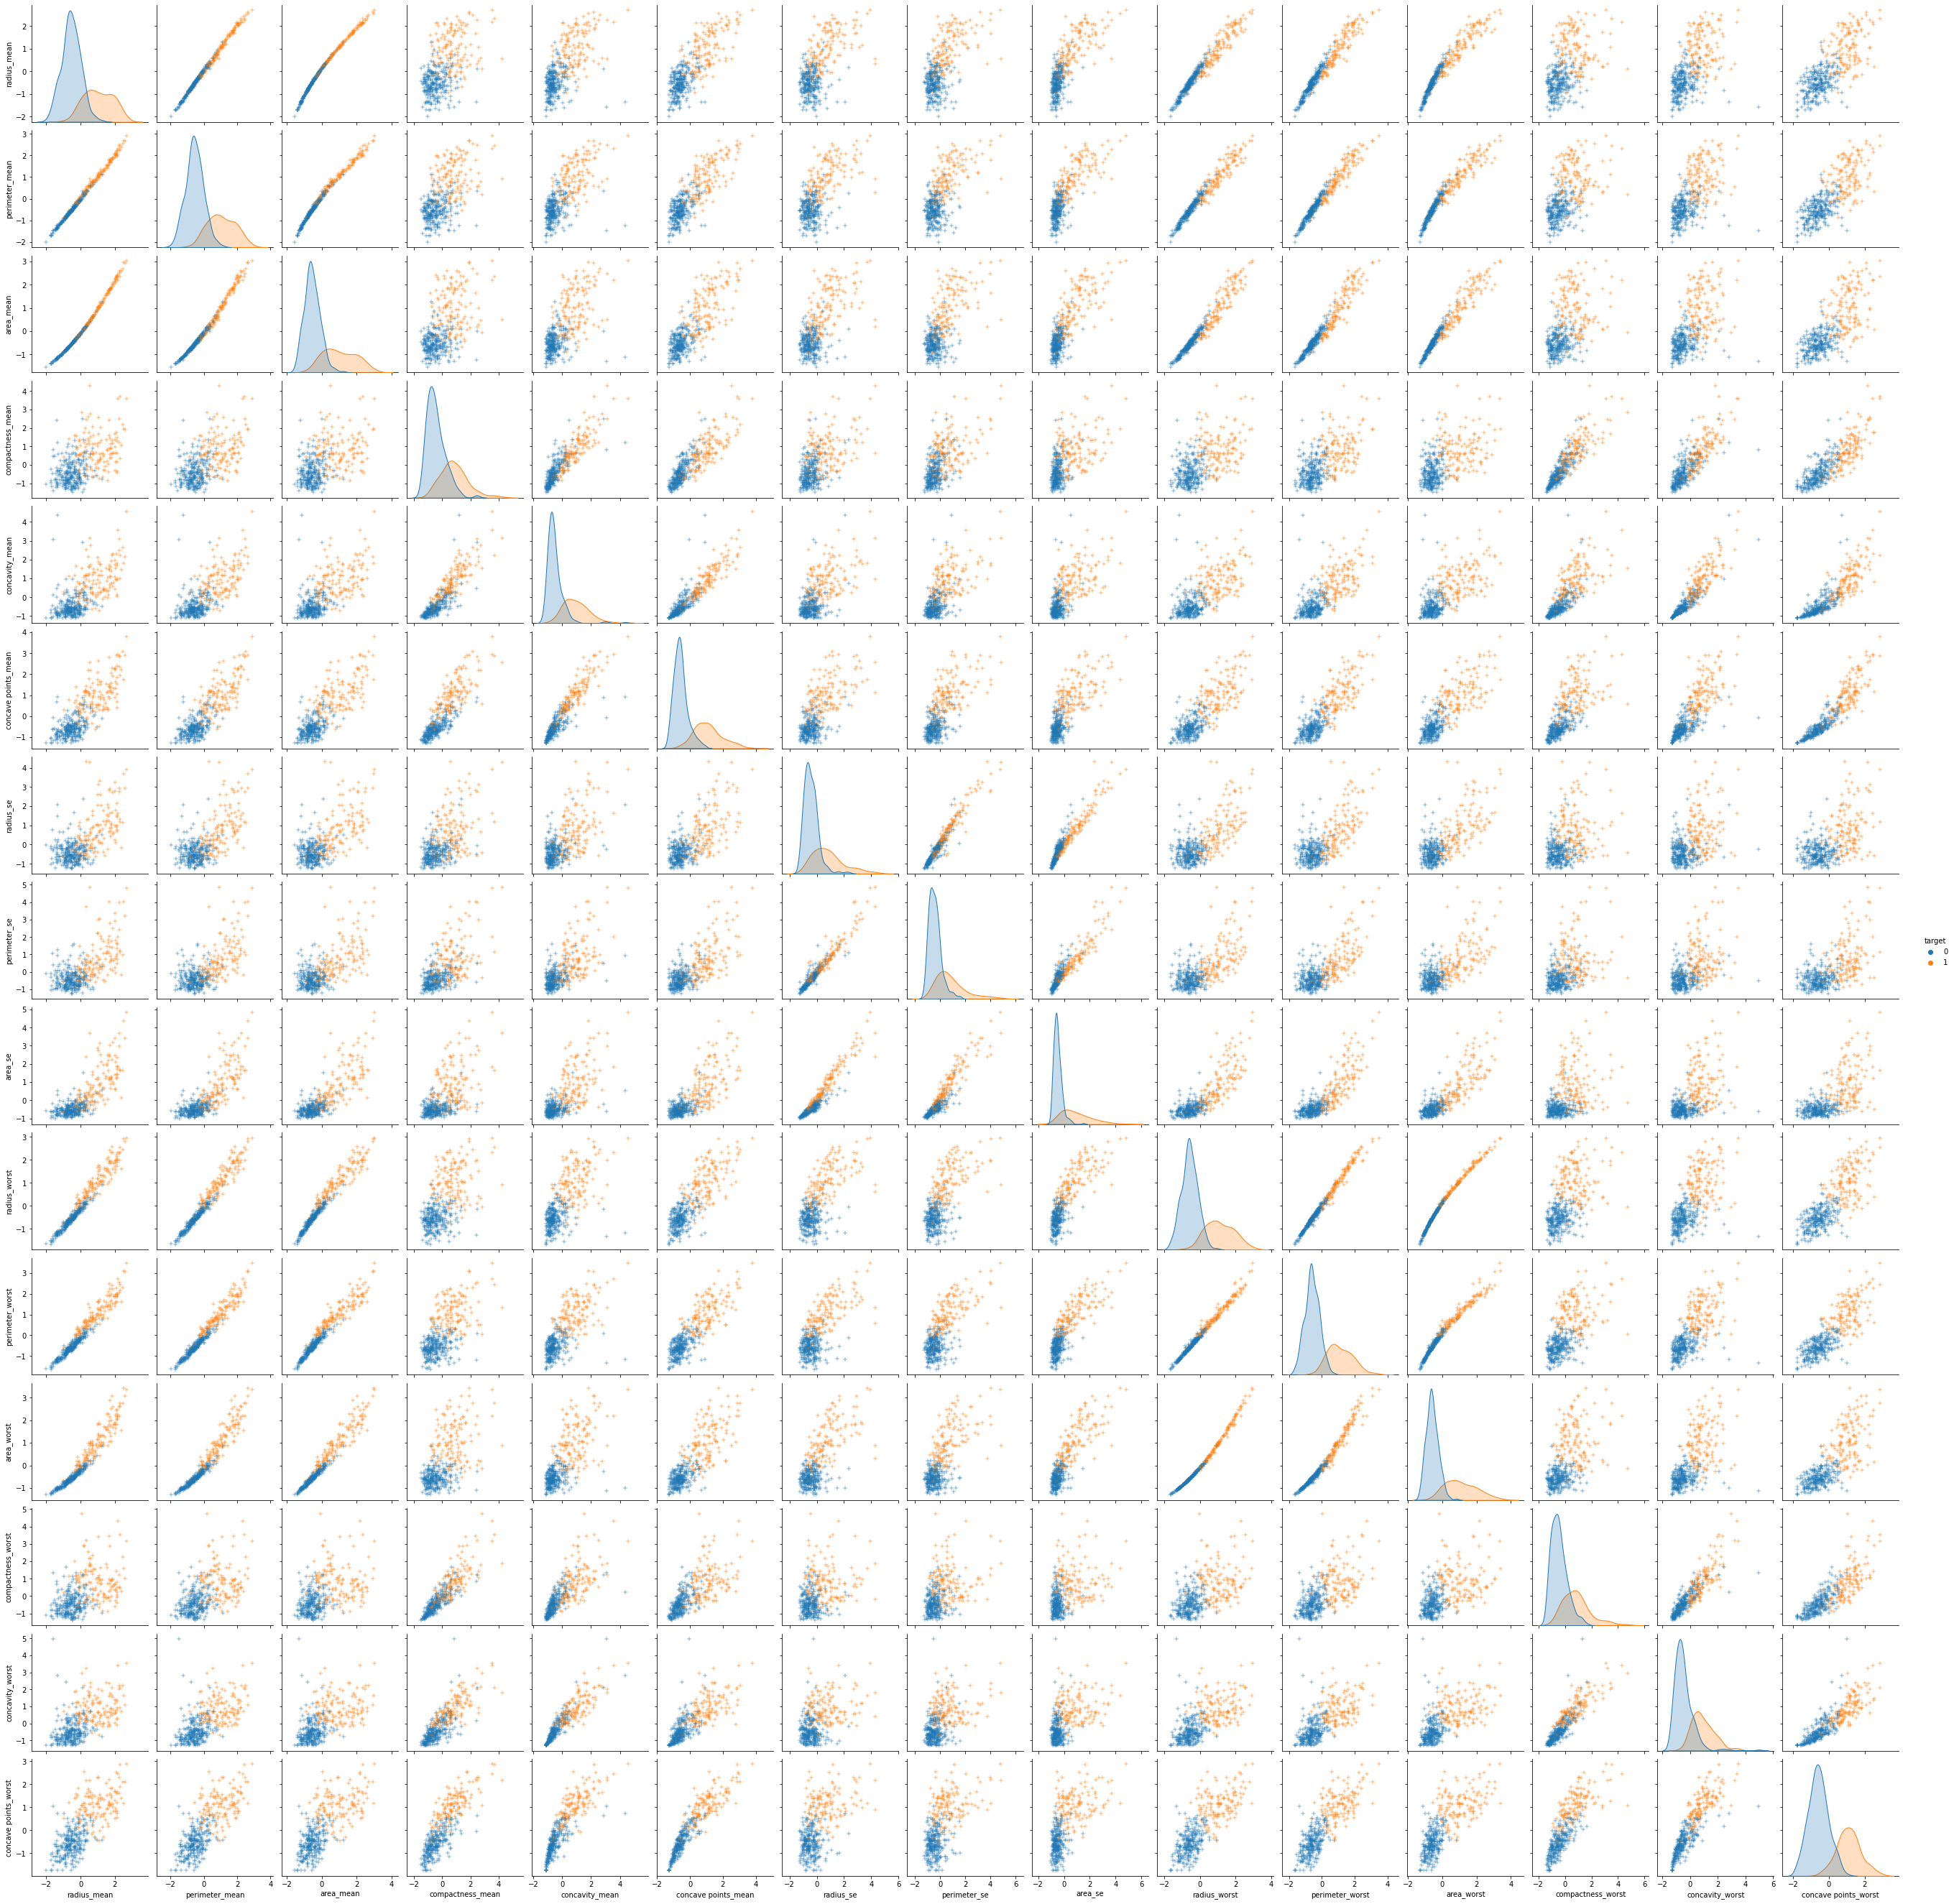

In [ ]:
sns.pairplot(X_train_df[corr_features], diag_kind = "kde", markers = "+",hue = "target")
plt.show()

 **K-Nearest Neighbors(KNN)**

KNN algoritması training aşamasına sahip olmadığından lazy learning bir algoritmadır.

k ve distance parametrelerini tuned etmesi kolaydır.

Kolay bir şekilde implemente edilebilir bir algoritmadır.

Outlierlara karşı hassas bir algoritmadır.

Veriseti büyüdükçe yavaşlar ve iyi sonuç üretmemeye başlar.

Eğer verisetinde çok fazla feature bulunuyorsa KNN algoritması iyi çalışmaz.

KNN algoritmasında uzaklık hesabı yapılacağından featureların farklı ölçeklendirilmesinden çok etkilenir. Bu yüzden scaling yapılmalıdır.

Datanın unbalanced olma durumundan etkilenir.

KNN algoritmasında k sayıda komşu veriye bakılarak, yeni verinin hangi classa ait olduğu euclidean distance hesaplanarak anlaşılmaya çalışılır.

In [ ]:
#Basic KNN Method

#Model fit
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
#Predict
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(Y_test, y_pred_test)
cm_train = confusion_matrix(Y_train, y_pred_train)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_of_train = accuracy_score(Y_train, y_pred_train)

In [ ]:
test_score = knn.score(X_test, Y_test)

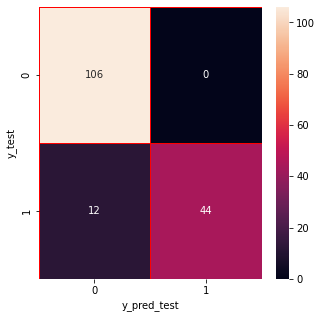

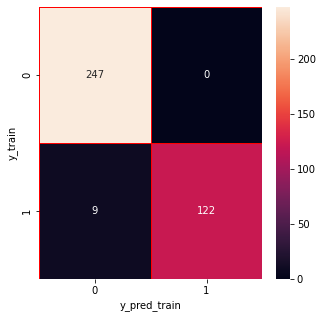

In [ ]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_test,annot=True,fmt= '.0f',linewidths=0.5,linecolor="red",ax=ax)
plt.xlabel("y_pred_test")
plt.ylabel("y_test")
plt.show()

f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_train,annot=True,fmt= '.0f',linewidths=0.5,linecolor="red",ax=ax)
plt.xlabel("y_pred_train")
plt.ylabel("y_train")
plt.show()

0-> iyi huylu tümör

1 -> köyü huylu tümör

**Confusion Matrix**

**TN FP**

**FN TP**

Confusion matrix'e bakarak; iyi huylu tümörde 106 sample'ın hepsinin doğru tahmin edildiği,

kötü huylu tümörde 56 sample'ın 44'ünün doğru tahmin edildiği, 12 sample'ın gerçekte kötü huylu tümör olup iyi huylu tümör olarak yanlış tahmin edildiği görülür.

In [ ]:
print("Test Score: ",test_score)

print("Train Score : ",accuracy_of_train)

Test Score:  0.9259259259259259
Train Score :  0.9761904761904762


k değeri 2 olduğunda test verisetinde %92 oranında bir accuracy elde edilmiştir.

Kötü huylu tümörde bulunan 12 yanlış tahminden dolayı accuracy'de %8'lik bir azalma vardır.

**KNN Best Parameters**

In [ ]:
from sklearn.model_selection import  GridSearchCV
def KNN_Best_Params(x_train, x_test, y_train, y_test):
    
    k_range = list(range(1,31))
    weight_options = ["uniform","distance"]
    print()
    param_grid = dict(n_neighbors = k_range, weights = weight_options)
    
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid, cv = 10, scoring = "accuracy")
    grid.fit(x_train, y_train)
    
    print("Best training score: {} with parameters: {}".format(grid.best_score_, grid.best_params_))
    print()
    
    knn = KNeighborsClassifier(**grid.best_params_)
    knn.fit(x_train, y_train)
    
    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)
    
    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)
    
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    
    print("Test Score: {}, Train Score: {}".format(acc_test, acc_train))
    print()
    
    f,ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(cm_test,annot=True,fmt= '.0f',linewidths=0.5,linecolor="red",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_test")
    plt.show()
    
    f,ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(cm_train,annot=True,fmt= '.0f',linewidths=0.5,linecolor="red",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_train")
    plt.show()
    
    return grid


Best training score: 0.9788051209103841 with parameters: {'n_neighbors': 5, 'weights': 'uniform'}

Test Score: 0.9197530864197531, Train Score: 0.9867724867724867



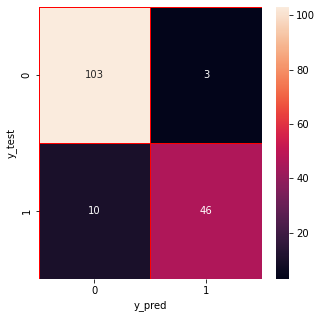

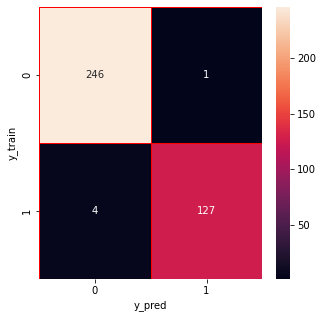

In [ ]:
grid = KNN_Best_Params(X_train, X_test, Y_train, Y_test)

**Overfitting:** Eğer modelin karmaşıklığı çok yüksekse veriyi ezberler ve yeni veri geldiğinde doğru tahminde bulunamaz, bu durum variance'ın artmasına sebep olur.

**Underfitting:** Oluşturulan model veriyi ifade edemediğinden öğrenemez. Bu durum yüksek bias'a sebep olur.

KNN algoritmasında model karmaşıklığı tuned edilmesi gereken k değeridir.

Train score test score'dan yüksektir, yüzde 7'lik bir fark oluşmuştur, overfitting durumu vardır.

train set error: %1.4

test set error: %8

train set ve test set arasındaki fark %6.6'dır, eğer bu fark %10 olsaydı kesinlikle overfitting durumu vardır denilebilirdi.

Eğer,

train set error: %30

test set error: %31 olsaydı, 

Bu durumda train setin başarısı çok yüksek değildir ve train set test set arasındaki fark oldukça azdır. Bu sebeple

Low bias olduğundan underfit durumu vardır denilebilir.

Bu projedeki overfitting durumunu çözmek için regularization, cross validation yapılabilir.

Modelin karmaşıklığını azaltıldığında varyans düşeceğinden, test verisetinin başarısının artması beklenir.

Ayrıca varyans düştüğü için train veriseti ezberlenmeyeceğinden train setinin başarısının düşmesi beklenir.

Basic KNN modelinde, model karmaşıklığı daha az olduğu için test verisetinin başarısının daha yüksek olduğu ve train veriseti ile test veri seti arasındaki farkın azaldığı görülür.

**Principal Component Analysis (PCA)**

PCA'de feature dimension ile datanın boyutu düşürülür.

Boyut düşürülürken, olabildiğince az veri kaybetmek amaçlanır. Bu da varyans yüksek tutularak olur.

PCA algoritmasının amacı eigen vectorleri ve eigen valueları bulmaktır.

Eigen vector yeni feature space'in direction'ıdır.

Eigen value'lar ise magnitudelarıdır.

x ve y eksenlerinde bulunan verinin farklı bir feature space'e taşınması için,

Verinin ilk önce x eksenindeki ve y eksenindeki ortalamaları bulunur.

Bu ortalama değerler x ekseninden ve y ekseninden çıkartılıp kendilerine eşitlenir.

Böylece veri 0 merkezli bir hale getirilmiştir.

**Covariance:** İki değişkenin birlikte ne kadar değiştiğinin ölçüsüdür.

cov(x,y) = E[xy] - E[x]E[y] = cov(y,x)
      
           E[X^2] - (E[x])^2 = var(x)
           
x ve y'nin covariance'sı bulunduğunda 2x2'lik bir matris oluşur.

cov(x,y) =  var(x) cov(x,y)
             
            cov(y,x) var(y)
            
Elde edilen covariance matristen eigen vector ve eigen value ortaya çıkar.

Eğer data 2 boyutluysa yeni feature space (eigen vector) de 2 boyutlu olabilir. (x,y)

Eigen vectorlere karşılık gelen eigen value bulunur.

Bir örnekle anlatılmak istenirse;

In [ ]:
x = [2.4, 0.6, 2.1, 2, 3, 2.5, 1.9, 1.1, 1.5, 1.2]
y = [2.5, 0.7, 2.9, 2.2, 3.0, 2.3, 2.0, 1.1, 1.6, 0.8]

In [ ]:
x=np.array(x)
y=np.array(y)

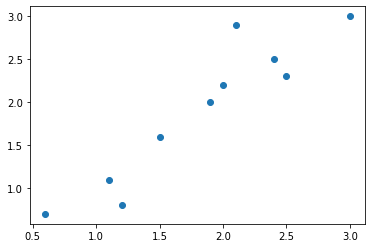

In [ ]:
plt.scatter(x,y)
plt.show()

0 merkezli olmayan bir plot ortaya çıkmıştır.

In [ ]:
x_mean = np.mean(x)
y_mean = np.mean(y)

0 merkezli olması için ilk önce eksenlerin ortalaması alınır.

In [ ]:
x = x - x_mean
y = y - y_mean

Ortalama değerler x ve y değerlerinden çıkarıldığında 0 merkeze çekilmiş olur.

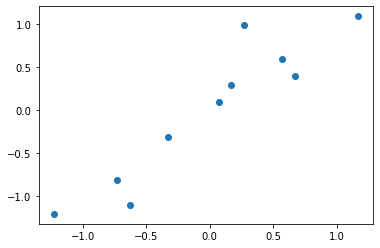

In [ ]:
plt.scatter(x,y)
plt.show()

Verinin artık 0 merkezli olduğu görülür.

In [ ]:
covariance = np.cov(x,y)
covariance

array([[0.53344444, 0.56411111],
       [0.56411111, 0.68988889]])

Covariance matris bulunduğuna göre eigen vector ve eigen value bulunabilir.

In [ ]:
from numpy import linalg as LA
w, v = LA.eig(covariance)

In [ ]:
w

array([0.04215805, 1.18117528])

w -> eigen valueları içerisinde barındıran matristir.

1.18 -> p1

0.04 -> p2

büyüklüğü düşük olan daha az öneme sahiptir.

In [ ]:
v

array([[-0.75410555, -0.65675324],
       [ 0.65675324, -0.75410555]])

v -> eigen vectorleri içerisinde barındıran matristir.

In [ ]:
p1 = v[:,1]
p2 = v[:,0]

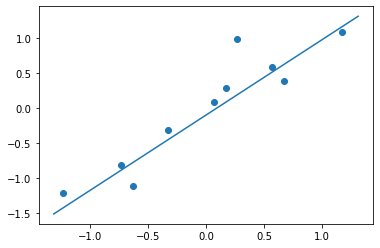

In [ ]:
plt.scatter(x,y)
plt.plot([-2*p1[0],2*p1[0]],[-2*p1[0],2*p1[1]])
plt.show()

eigen value'su büyük olduğu için p1 main component'tır.

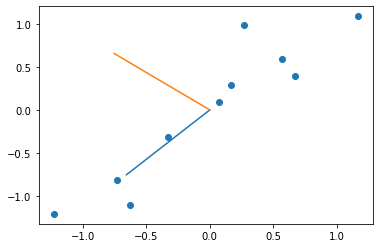

In [ ]:
plt.scatter(x,y)
plt.plot([0,p1[0]],[0,p1[1]])
plt.plot([0,p2[0]],[0,p2[1]])
plt.show()

p2'nin p1'e dik olduğu görülür.

**PCA Evaluation**

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

PCA unsupervised learning bir algoritma olduğundan x_train, x_test olarak ayırmak yerine tüm x datası scale edilir.

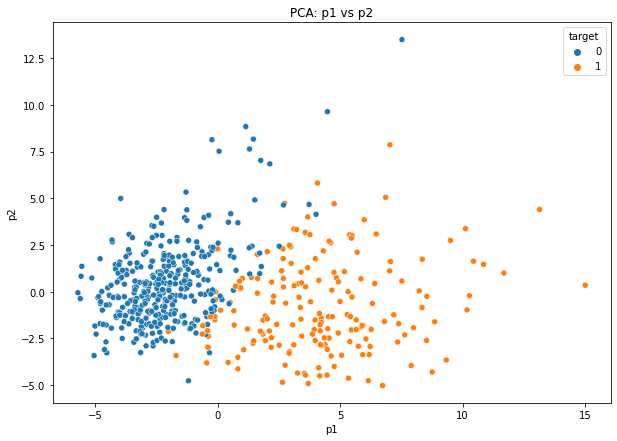

In [ ]:
from sklearn.decomposition import PCA

plt.figure(figsize=(10,7))
pca = PCA(n_components = 2)
pca.fit(x_scaled)
X_reduced_pca = pca.transform(x_scaled)
pca_data = pd.DataFrame(X_reduced_pca, columns = ["p1","p2"])
pca_data["target"] = y
sns.scatterplot(x = "p1", y = "p2", hue = "target", data = pca_data)
plt.title("PCA: p1 vs p2")
plt.show()

Veride 30 feature bulunmaktadır. 

Veri 30 boyuttan, 2 boyuta düşürülmek istendiği için n_component 2 seçilmiştir.

30 boyutlu veri PCA kullanılarak 2 boyutlu hale getirilmiştir.

Bazı kötü huylu veriler, iyi huylu verilerin arasına karışmıştır. 

Eğer bu veriler ayrılmazsa, sınıflandırma yapılırken yanlış sınıflandırılacağından accuracy'i düşürecektir.

In [ ]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_reduced_pca, y, test_size = 0.3, random_state = 42)


Best training score: 0.9493598862019914 with parameters: {'n_neighbors': 13, 'weights': 'uniform'}

Test Score: 0.9074074074074074, Train Score: 0.9629629629629629



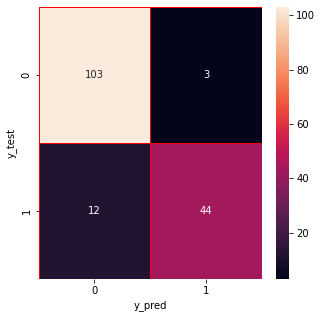

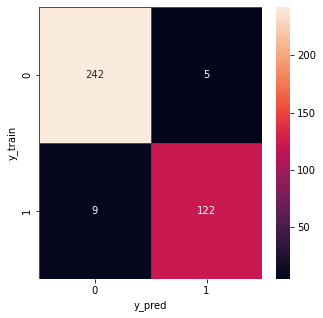

In [ ]:
grid_pca = KNN_Best_Params(X_train_pca, X_test_pca, Y_train_pca, Y_test_pca)

PCA ile test accuracy %90, training accuracy %94'tür.

Test accuracy'nin düştüğü ve yanlış tahminlerin arttığı görülür. Ancak train set ile test set arasındaki farkın azaldığı görülür.

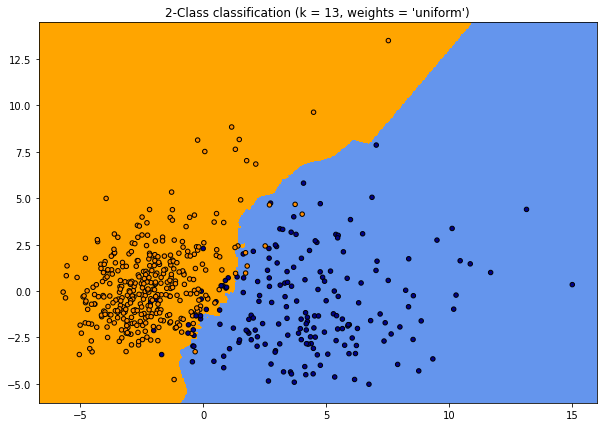

In [ ]:
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

h = .05 # step size in the mesh
X = X_reduced_pca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = grid_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,7))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')"
          % (len(np.unique(y)),grid_pca.best_estimator_.n_neighbors, grid_pca.best_estimator_.weights))
plt.show()

İyi huylu tümör sarı class, kötü huylu tümör mavi class'tır.

Yanlış sınıflandırılan veriler gözükmektedir.

**Neighborhood Components Analysis (NCA)**

**Leave one out**: mesafe ölçüsü kullanarak K en yakın komşunun birlikte başka tek bir noktayı tahmin etmeye çalıştığı yöntemdir.

NCA, leave one out sınıflandırma performansını maksimize edecek şekilde input verilerinin doğrusal dönüşümünü kullanarak mesafe metriğini öğrenme yöntemidir.

Rastgele bir mesafe metriği belirlemek yerine doğrusal dönüşümü bulup, bu metriği NCA algoritması kendisi öğrenmektedir.

NCA, PCA'in gibi unsupervised learning algoritması değildir.

Bu yüzden predict işlemi gerçekleştirilirken y, yani target değişkenine ihtiyaç vardır.

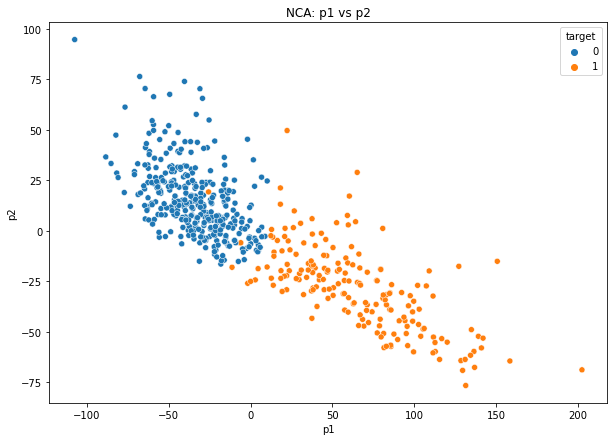

In [ ]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis

plt.figure(figsize=(10,7))
nca = NeighborhoodComponentsAnalysis(n_components = 2, random_state = 42)
nca.fit(x_scaled, y)
X_reduced_nca = nca.transform(x_scaled)
nca_data = pd.DataFrame(X_reduced_nca, columns = ["p1","p2"])
nca_data["target"] = y
sns.scatterplot(x = "p1",  y = "p2", hue = "target", data = nca_data)
plt.title("NCA: p1 vs p2")
plt.show()

PCA'ye göre iki classın birleştiği yerde neredeyse çok az iç içe geçme söz konusudur.

Ayrıca çok az veri yanlış sınıflandırılmıştır.

In [ ]:
X_train_nca, X_test_nca, Y_train_nca, Y_test_nca = train_test_split(X_reduced_nca, y, test_size = 0.3, random_state = 42)


Best training score: 0.9921052631578947 with parameters: {'n_neighbors': 6, 'weights': 'distance'}

Test Score: 0.9876543209876543, Train Score: 1.0



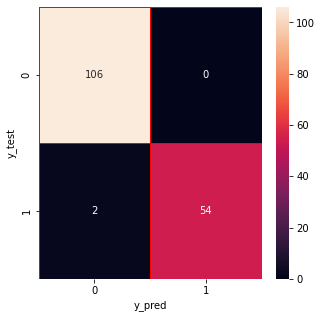

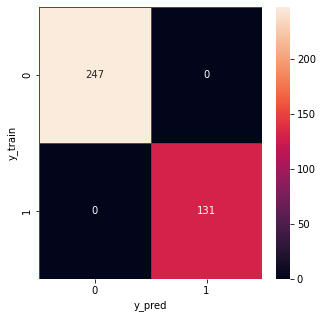

In [ ]:
grid_nca = KNN_Best_Params(X_train_nca, X_test_nca, Y_train_nca, Y_test_nca)

Test verisetinde %98'lik bir başarı, train veri setinde %100'luk bir başarı elde edilmiştir.

Test veri setinde 2 yanlış sınıflandırma yapılmıştır.

Low bias ve low variance durumu söz konusudur.

Train veri setinde %100'lük bir başarı elde edilmiş ve neredeyse aynı performans test verisetinde de elde edilmiştir.

Bu durumda overfitting yoktur.

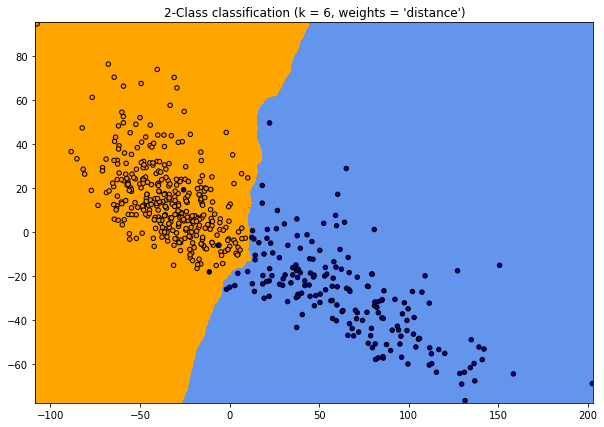

In [ ]:
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

h = .5 #step size in the mesh
X = X_reduced_nca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = grid_nca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,7))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')"
          % (len(np.unique(y)),grid_nca.best_estimator_.n_neighbors, grid_nca.best_estimator_.weights))
plt.show()

**Evaluation of Test Results**

In [ ]:
knn = KNeighborsClassifier(**grid_nca.best_params_)
knn.fit(X_train_nca,Y_train_nca)
y_pred_nca = knn.predict(X_test_nca)
acc_test_nca = accuracy_score(y_pred_nca,Y_test_nca)
knn.score(X_test_nca,Y_test_nca)

0.9876543209876543

In [ ]:
test_data = pd.DataFrame()
test_data["X_test_nca_p1"] = X_test_nca[:,0]
test_data["X_test_nca_p2"] = X_test_nca[:,1]
test_data["y_pred_nca"] = y_pred_nca
test_data["Y_test_nca"] = Y_test_nca

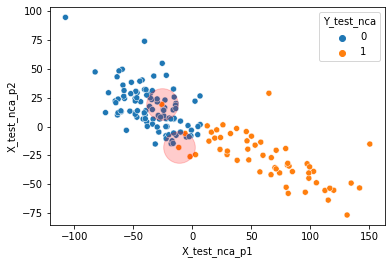

In [ ]:
plt.figure()
sns.scatterplot(x="X_test_nca_p1", y="X_test_nca_p2", hue="Y_test_nca",data=test_data)

diff = np.where(y_pred_nca!=Y_test_nca)[0]
plt.scatter(test_data.iloc[diff,0],test_data.iloc[diff,1],label = "Wrong Classified",alpha = 0.2,color = "red",s = 1000)
plt.show()

Test verisetinde hangi verilerin yanlış sınıflandırıldığı görselleştirilmiştir.